In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

In [2]:
x, y = make_regression(
    n_samples=120,     
    n_features=1,       
    noise=15,           
    random_state=42     
)

In [3]:
x.shape

(120, 1)

In [4]:
y.shape

(120,)

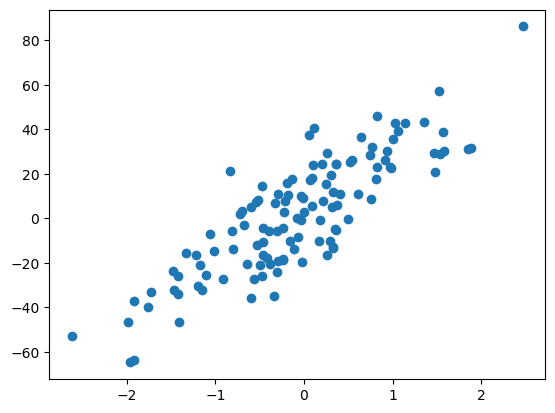

In [5]:
plt.scatter(x,y)

### creating our own Linear regression class for 1 feature using closed loop equation ###

In [6]:
class lrg:
    def __init__(self):
        self.m= None
        self.b= None

    def fit(self,x,y):
        self.m = 1
        self.b = 0

        num = 0
        den = 0
        for i in range(x.shape[0]):
            num+= (x[i] - np.mean(x))*(y[i] - np.mean(y))
            den+= (x[i] - np.mean(x))*(x[i] - np.mean(x))
        self.m= num/den
        self.b = np.mean(y)- self.m*(np.mean(x))

    def predict(self,x):
        return (x*self.m)+self.b

In [7]:
l1 = lrg()

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [9]:
l1.fit(x_train,y_train)

### Using sklearn's linear regression ###

In [10]:
l2 = LinearRegression()

In [11]:
l2.fit(x_train,y_train)

LinearRegression()

In [12]:
y_pred1 = l1.predict(x_test)

In [13]:
y_pred2 = l2.predict(x_test)

### Plotting the linear regression line on the graph to see the difference between the custom made line and the sklearn's line

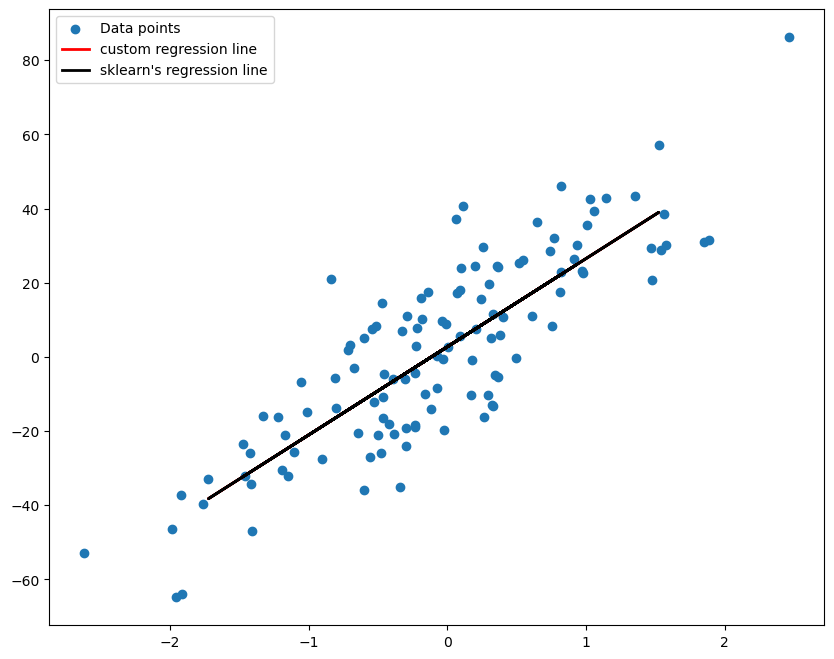

In [14]:
plt.figure(figsize=(10,8))
plt.scatter(x,y,label="Data points")
plt.plot(x_test,y_pred1, color="red", linewidth = 2, label="custom regression line")
plt.plot(x_test,y_pred2, color="black", linewidth = 2, label="sklearn's regression line")
plt.legend()

plt.show()